# Futoshiki
Original [Futoshiki](https://conjure.readthedocs.io/en/latest/tutorials.html#futoshiki) by Ruth Hoffmann and Gökberk Koçak. Adapted by Alex Gallagher.

## Problem

In [1]:
!source <(curl -s https://raw.githubusercontent.com/conjure-cp/conjure-notebook/v0.0.9/scripts/install-colab.sh)
%load_ext conjure

Installing Conjure version v2.5.1 and Conjure Notebook version v0.0.9...
Downloading...
Conjure: The Automated Constraint Modelling Tool
Release version 2.5.0
Repository version c94cde5 (2023-11-06 17:43:12 +0000)


<IPython.core.display.Javascript object>

Conjure extension is loaded.
For usage help run: %conjure_help


`n x n` board where each column and row is filled with the unique numbers from 1 to `n`, similar to a sudoku. In contrast to sudoku, there are less than and greater than symbols between cells indicating that one cell has to be filled with a number greater than (or less than) than the cell on the other side of the operator.


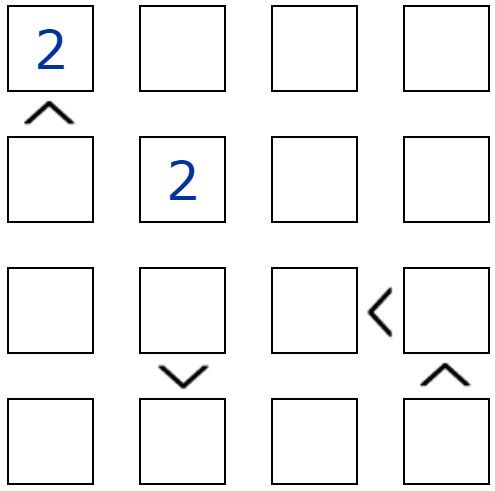

## Instance

The definition of the instance below contains the information about our starting board of a specific instance that we want to solve. See the picture at the beginning to see what it looks like.

In [2]:
%%conjure

letting n be 4

```json
{}
```

We are dealing with a 4 by 4 board.

In [3]:
%%conjure+

letting hints be function(
        (1,1) --> 2,
        (2,2) --> 2
)

```json
{}
```

There will be two `2` s on the board given as a hint. One in the top left corner `(1,1)` and the second number 2 in cell `(2,2)`.

In [4]:
%%conjure+

letting less_than be relation(
        ((1,1) , (2,1)),
        ((4,2) , (3,2)),
        ((3,3) , (3,4)),
        ((3,4) , (4,4))
)

```json
{}
```

There are 4 relation symbols on the board, between cells.

## Solving the problem step by step

The line by line explanation of the model starts here.

In [5]:
%%conjure+

letting DOMAIN be domain int(1..n)

```json
{}
```

We start at 1 and go up to `n` (for both the elements of the cells and the cell locations).

In [6]:
%%conjure+

find board : matrix indexed by [DOMAIN, DOMAIN] of DOMAIN

```json
{"board": {"1": {"1": 1, "2": 1, "3": 1, "4": 1}, "2": {"1": 1, "2": 1, "3": 1, "4": 1}, "3": {"1": 1, "2": 1, "3": 1, "4": 1}, "4": {"1": 1, "2": 1, "3": 1, "4": 1}}}
```

We are now telling the solver that we are trying to find a `n x n` board with elements from 1 to `n` in each cell.

`such that` indicates the beginning of the constraints block.

In [7]:
%%conjure+

such that forAll (hint,num) in hints .
        board[hint[1], hint[2]] = num,

```json
{"board": {"1": {"1": 2, "2": 1, "3": 1, "4": 1}, "2": {"1": 1, "2": 2, "3": 1, "4": 1}, "3": {"1": 1, "2": 1, "3": 1, "4": 1}, "4": {"1": 1, "2": 1, "3": 1, "4": 1}}}
```

This constraint defines the hints, so the cells that are filled in when we get the puzzle.

In [8]:
%%conjure+ --solver=minion

such that forAll i: DOMAIN .
        allDiff(board[i,..]),

```json
{"board": {"1": {"1": 2, "2": 1, "3": 3, "4": 4}, "2": {"1": 1, "2": 2, "3": 3, "4": 4}, "3": {"1": 1, "2": 2, "3": 3, "4": 4}, "4": {"1": 1, "2": 2, "3": 3, "4": 4}}}
```

This constraint defines that every cell in a row has to be a unique number between 1 and n.

In [9]:
%%conjure+ --solver=minion

such that forAll j: DOMAIN .
        allDiff(board[..,j]),

```json
{"board": {"1": {"1": 2, "2": 1, "3": 3, "4": 4}, "2": {"1": 1, "2": 2, "3": 4, "4": 3}, "3": {"1": 3, "2": 4, "3": 1, "4": 2}, "4": {"1": 4, "2": 3, "3": 2, "4": 1}}}
```

This constraint defines that every cell in a column has to be a unique number between 1 and n.

In [10]:
%%conjure+

such that forAll (l,g) in less_than .
        board[l[1],l[2]] < board[g[1],g[2]]

```json
{"board": {"1": {"1": 2, "2": 1, "3": 4, "4": 3}, "2": {"1": 4, "2": 2, "3": 3, "4": 1}, "3": {"1": 3, "2": 4, "3": 1, "4": 2}, "4": {"1": 1, "2": 3, "3": 2, "4": 4}}}
```

Finally this constraint enforces the less than relation. `l` is the number that is the cell that contains the number that is less than then the cell `g`.

## Visualising the results

Printing the result gives us:

In [11]:
for row in board:
  for square in board[row]:
    print(board[row][square], end=" ")
  print("")

2 1 4 3 
4 2 3 1 
3 4 1 2 
1 3 2 4 


This is represented in the following graph:

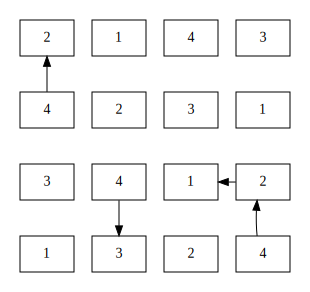

In [12]:
import graphviz

p = graphviz.Digraph('parent')
p.attr(compound='true')
p.attr(rankdir="TB")


id = 0
rowNum = 0

for row in board:
  with p.subgraph(name='cluster'+str(rowNum)) as c:
    p.attr(style='invis')

    for square in range(4,0,-1):
      c.node(str(id), str(board[row][str(square)]), shape='box')
      id = id +1
  rowNum = rowNum + 1;

p.edge('0', '4', None, {'style':'invis', 'rank':'same'})
p.edge('4', '8', None, {'style':'invis', 'rank':'same'})
p.edge('8', '12', None, {'style':'invis', 'rank':'same'})

p.edge('7','3', None, {'constraint':'False'})
p.edge('8','9', None, {'constraint':'False'})
p.edge('12','8', None, {'constraint':'False'})
p.edge('10','14', None, {'constraint':'False'})

p
